<a href="https://colab.research.google.com/github/JyothiMekalaa/Major-Project/blob/main/Major_Projectt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow keras

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L, preprocess_input
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from tensorflow.keras.backend import sum
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

In [ ]:
import os
import shutil
import itertools
import pathlib
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset paths
train_path = "/content/drive/MyDrive/Dataset/chest_xray/train"
test_path = "/content/drive/MyDrive/Dataset/chest_xray/test"

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

training_data_path = '/content/drive/MyDrive/Dataset/chest_xray/train'

batch_size = 16
img_height = 224
img_width = 224


data_generator = image_dataset_from_directory(
    training_data_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=16,
    image_size=(224, 224),
    color_mode='rgb'
)
class_names = data_generator.class_names
for images, labels in data_generator.take(1):
    print("Shape of images array:", images.shape)

Found 5261 files belonging to 2 classes.
Shape of images array: (16, 224, 224, 3)


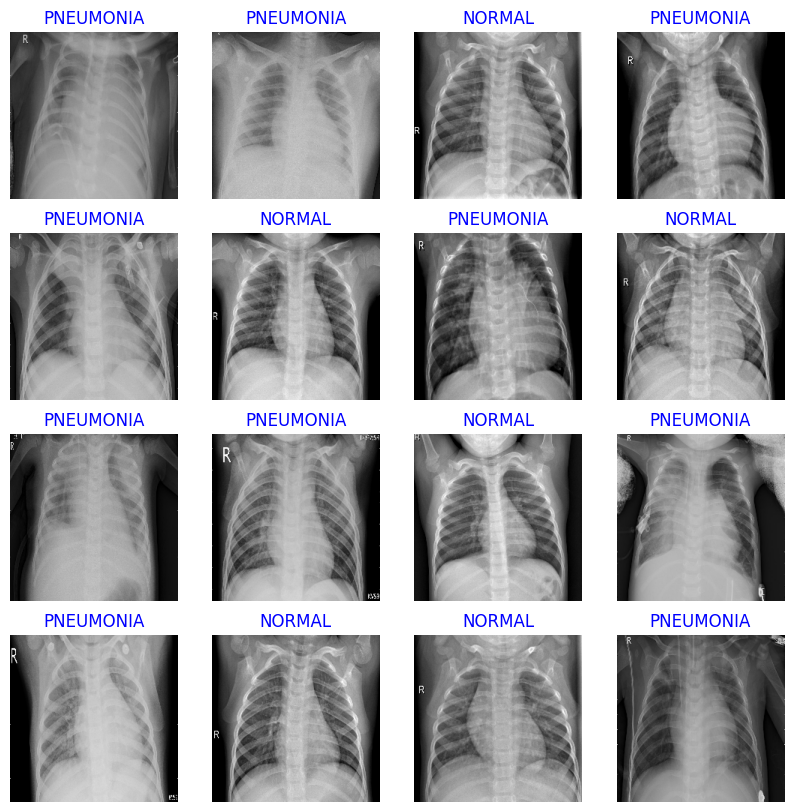

In [ ]:
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        image = images[i].numpy().astype("uint8")
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = class_names[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')

    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
    )

val_datagen = ImageDataGenerator(rescale=1./255)

training_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/chest_xray/train',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

testing_data = val_datagen.flow_from_directory( # Using val_datagen for testing data
    '/content/drive/MyDrive/Dataset/chest_xray/test',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

validation_data = val_datagen.flow_from_directory( # Defining validation_data
    '/content/drive/MyDrive/Dataset/chest_xray/val',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

Found 5261 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


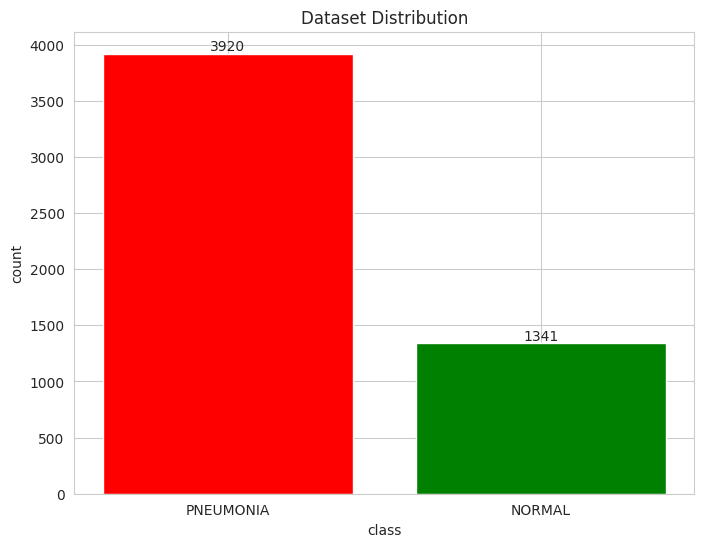

In [ ]:
import os
import matplotlib.pyplot as plt

pneumonia_dataset_path = '/content/drive/MyDrive/Dataset/chest_xray/train'
if not os.path.exists(pneumonia_dataset_path):
    print(f"Error: The specified path '{pneumonia_dataset_path}' does not exist.")
else:
    pneumonia_images_path = os.path.join(pneumonia_dataset_path, 'PNEUMONIA')
    pneumonia_count = len(os.listdir(pneumonia_images_path))

    normal_images_path = os.path.join(pneumonia_dataset_path, 'NORMAL')
    normal_count = len(os.listdir(normal_images_path))

    labels = ['PNEUMONIA', 'NORMAL']
    counts = [pneumonia_count, normal_count]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, counts, color=['red', 'green'])
    plt.xlabel('class')
    plt.ylabel('count')
    plt.title('Dataset Distribution')

    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

    plt.show()

In [ ]:
training_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

IMAGE_SIZE = (224, 224)

base_model_vgg16 = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)

for layer in base_model_vgg16.layers[:-8]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
predictions = Dense(2, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-6),
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.AUC(name='auc')
    ]
)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/chest_xray/train',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/chest_xray/test',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=1e-6
)
hist_vgg16 = model_vgg16.fit(
    train_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set),
    callbacks=[learning_rate_reduction],
    verbose=1
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Found 5261 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1392s 8s/step - accuracy: 0.6106 - auc: 0.6400 - loss: 1.0238 - precision: 0.6106 - recall: 0.6106 - val_accuracy: 0.6250 - val_auc: 0.7747 - val_loss: 0.6080 - val_precision: 0.6250 - val_recall: 0.6250 - learning_rate: 1.0000e-06
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 150s 827ms/step - accuracy: 0.7416 - auc: 0.7993 - loss: 0.7251 - precision: 0.7416 - recall: 0.7416 - val_accuracy: 0.8253 - val_auc: 0.8998 - val_loss: 0.4441 - val_precision: 0.8253 - val_recall: 0.8253 - learning_rate: 1.0000e-06
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 135s 814ms/step - accuracy: 0.7719 - auc: 0.8312 - loss: 0.6582 - precision: 0.7719 - recall: 0.7719 - val_accuracy: 0.8478 - val_auc: 0.9071 - val_loss: 0.3903 - val_precision: 0.8478 - val_recall: 0.8478 - learning_rate: 1.0000e-06
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 137s 8

In [ ]:
print("VGG16 Model Summary:")
model_vgg16.summary()

VGG16 Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 41,862,728 (159.69 MB)

 Trainable params: 13,375,234 (51.02 MB)

 Non-trainable params: 1,737,024 (6.63 MB)

 Optimizer params: 26,750,470 (102.04 MB)

In [ ]:
vgg16_acc = hist_vgg16.history['accuracy'][-1]
vgg16_prec = hist_vgg16.history['precision'][-1]
vgg16_rec = hist_vgg16.history['recall'][-1]
vgg16_f1 = hist_vgg16.history['auc'][-1] if 'auc' in hist_vgg16.history else 0.0


if isinstance(vgg16_f1, tf.Tensor):
    vgg16_f1 = vgg16_f1.numpy().mean()

def storeResults(mode_name, accuracy, precision, recall, f1_score):
  print(f"VGG16 Training Accuracy: {vgg16_acc:.4f}")
  print(f"VGG16 Precision: {vgg16_prec:.4f}")
  print(f"VGG16 Recall: {vgg16_rec:.4f}")
  print(f"VGG16 F1-score: {vgg16_f1:.4f}")

storeResults('VGG16', vgg16_acc, vgg16_prec, vgg16_rec, vgg16_f1)

VGG16 Training Accuracy: 0.9166
VGG16 Precision: 0.9166
VGG16 Recall: 0.9166
VGG16 F1-score: 0.9621


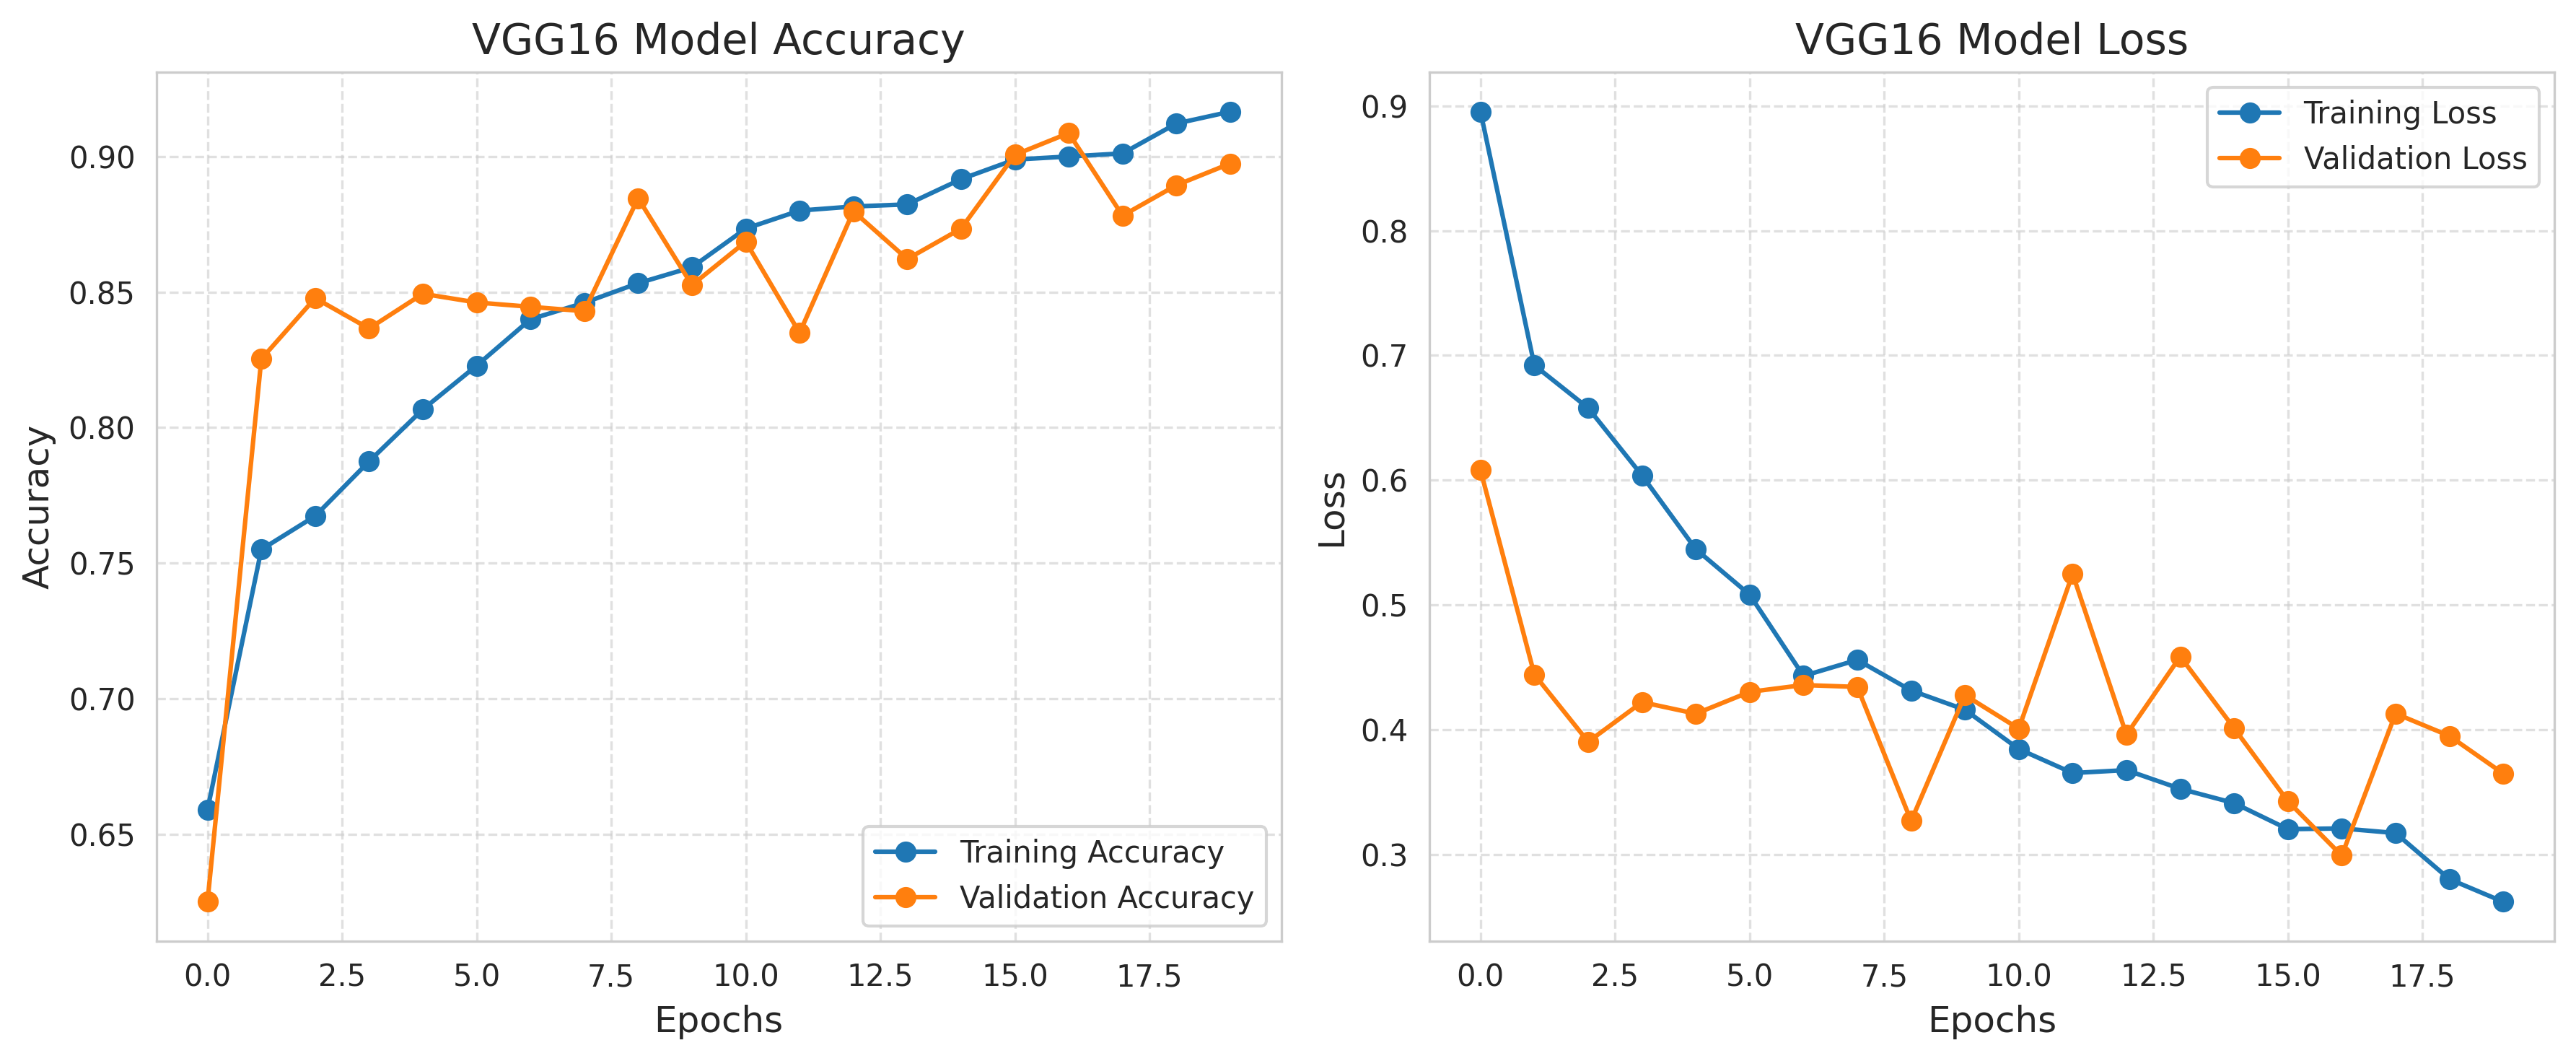

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.title('VGG16 Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(hist_vgg16.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(hist_vgg16.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)


plt.subplot(1, 2, 2)
plt.title('VGG16 Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(hist_vgg16.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(hist_vgg16.history['val_loss'], label='Validation Loss', linestyle='-', marker='o')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

**VGG19**

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

IMAGE_SIZE = (224, 224)
base_model = VGG19(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
for layer in base_model.layers[:-6]:
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.00005),
    metrics=['accuracy',
             metrics.Precision(name='precision'),
             metrics.Recall(name='recall'),
             metrics.AUC(name='auc')]
)

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, horizontal_flip=True, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/chest_xray/train',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/chest_xray/test',
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

hist = model.fit(train_set,
                 validation_data=test_set,
                 epochs=5,steps_per_epoch=len(train_set),
                 validation_steps=len(test_set),
                 callbacks=[learning_rate_reduction, early_stop])

Found 5261 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 171s 964ms/step - accuracy: 0.7182 - auc: 0.7798 - loss: 0.7416 - precision: 0.7182 - recall: 0.7182 - val_accuracy: 0.6250 - val_auc: 0.7875 - val_loss: 1.7143 - val_precision: 0.6250 - val_recall: 0.6250 - learning_rate: 5.0000e-05
Epoch 2/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 150s 908ms/step - accuracy: 0.8413 - auc: 0.8930 - loss: 0.4787 - precision: 0.8413 - recall: 0.8413 - val_accuracy: 0.3750 - val_auc: 0.3762 - val_loss: 8.6014 - val_precision: 0.3750 - val_recall: 0.3750 - learning_rate: 5.0000e-05
Epoch 3/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 203s 916ms/step - accuracy: 0.8969 - auc: 0.9436 - loss: 0.3192 - precision: 0.8969 - recall: 0.8969 - val_accuracy: 0.5176 - val_auc: 0.6373 - val_loss: 1.3529 - val_precision: 0.5176 - val_recall: 0.5176 - learning_rate: 5.0000e-05
Epoch 4/5
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.9342 - auc: 0.9644 - loss: 0.24

In [ ]:
vgg_acc = hist.history["accuracy"][-1]
vgg_prec = hist.history["precision"][-1]  # Change 'precision_m' to 'precision'
vgg_rec = hist.history["recall"][-1]  # Change 'recall_m' to 'recall'
vgg_f1 = hist.history["auc"][-1]  # Change 'f1_m' to 'auc'


def storeResults(model_name, accuracy, precision, recall, f1_score):
    print(f"Results for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1_score:.4f}")

storeResults('VGG19', vgg_acc, vgg_prec, vgg_rec, vgg_f1)

Results for VGG19:
  Accuracy: 0.9424
  Precision: 0.9424
  Recall: 0.9424
  F1-score: 0.9719


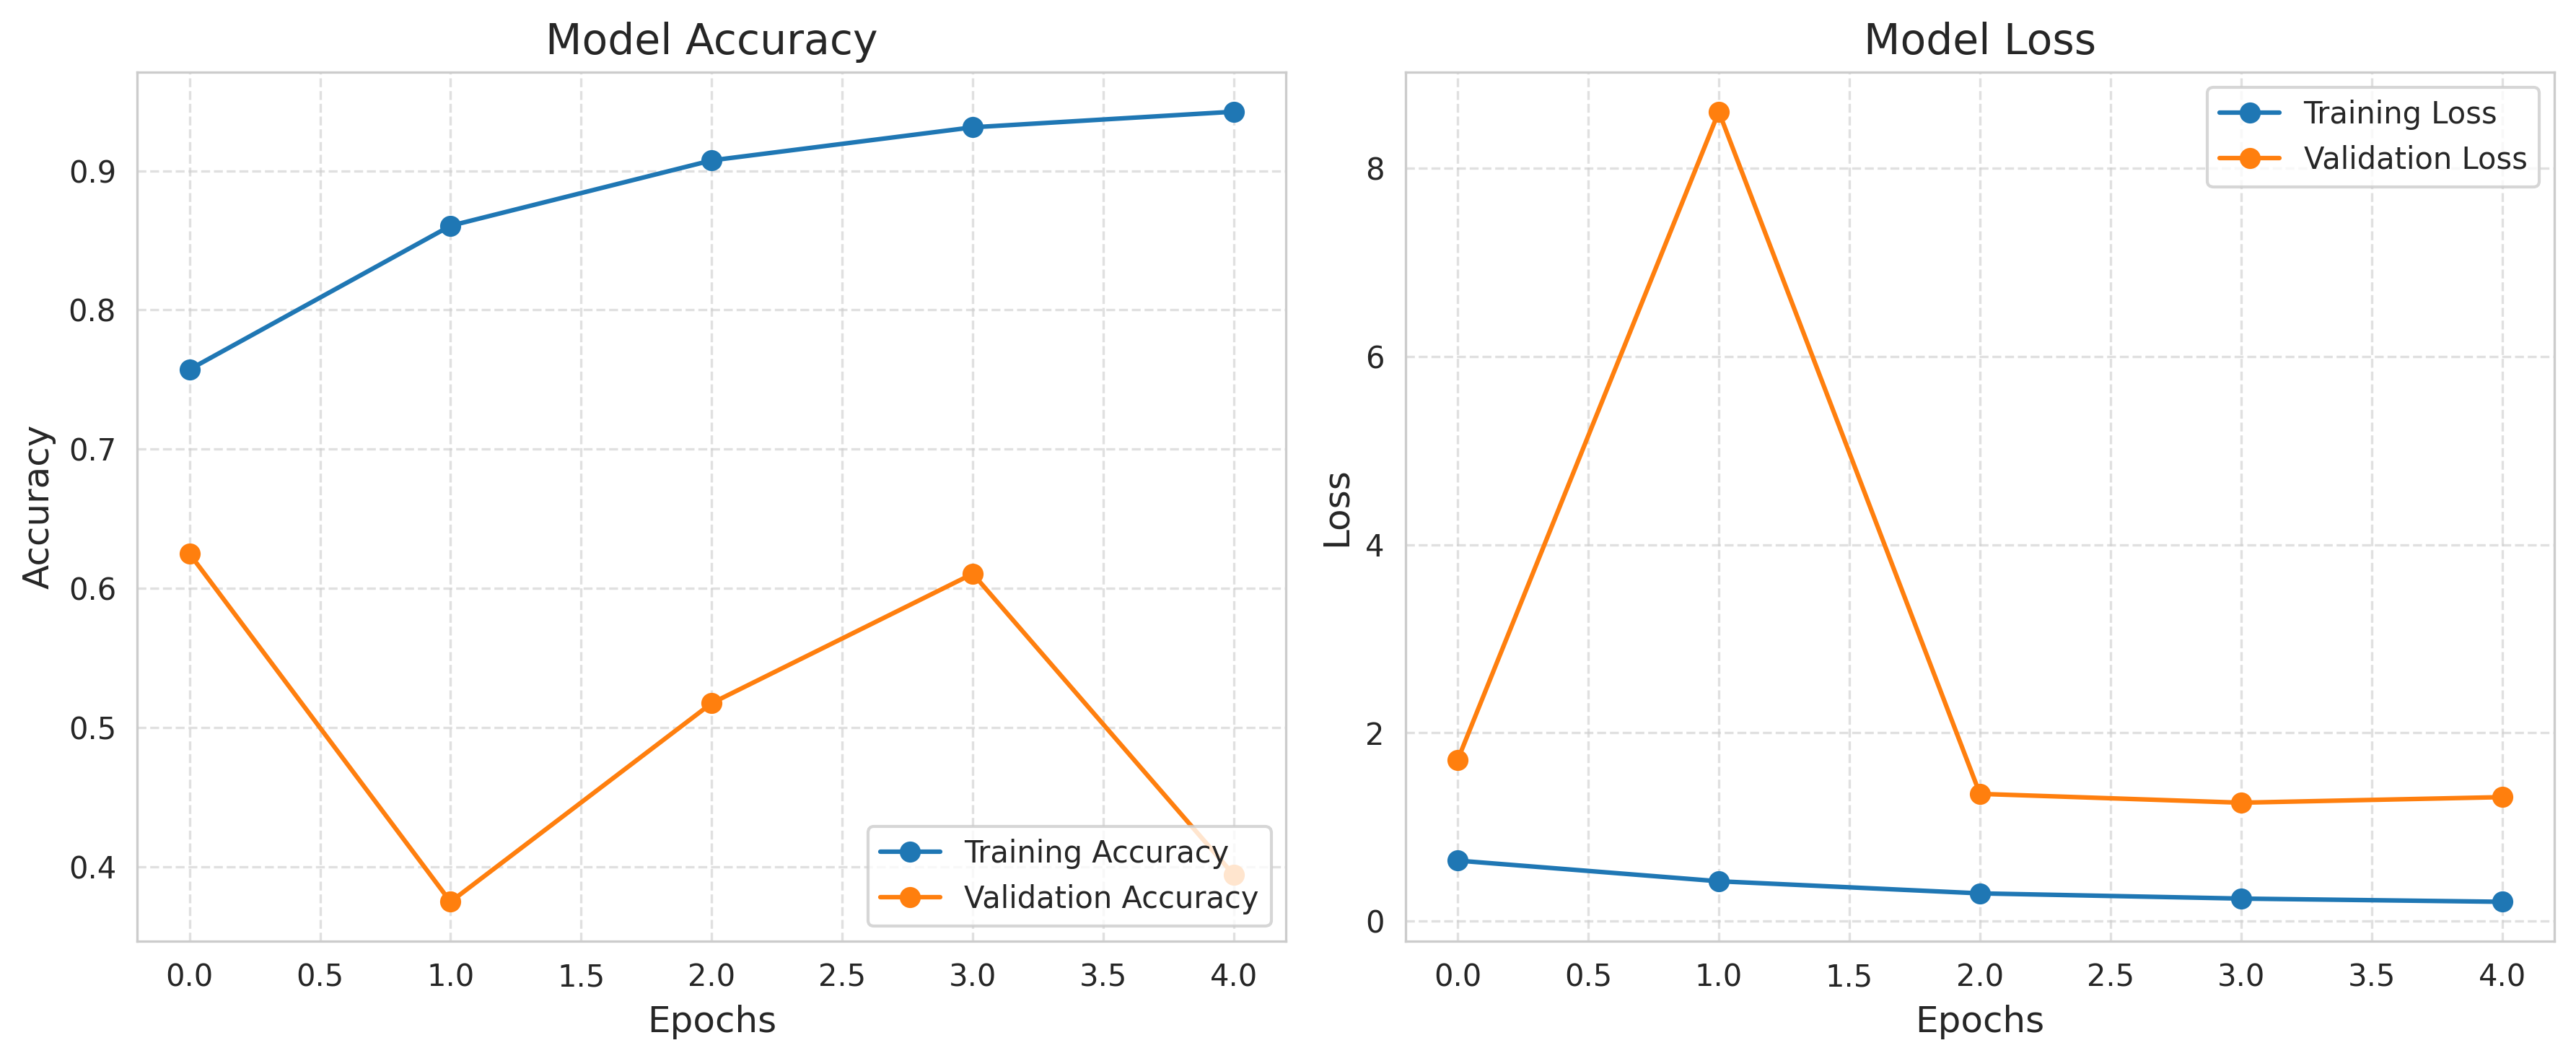

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(hist.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)


plt.subplot(1, 2, 2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(hist.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(hist.history['val_loss'], label='Validation Loss', linestyle='-', marker='o')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()


**ResNet50**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

train_dir = "/content/drive/MyDrive/Dataset/chest_xray/train"
val_dir = "/content/drive/MyDrive/Dataset/chest_xray/val"

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:140]:
    layer.trainable = False
for layer in base_model.layers[140:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

history = model.fit(train_generator,validation_data=val_generator,epochs=20,callbacks=[lr_reduction],verbose=1)

Found 5261 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 162s 843ms/step - accuracy: 0.6761 - loss: 0.7692 - val_accuracy: 0.5000 - val_loss: 0.7990 - learning_rate: 1.0000e-04
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 122s 742ms/step - accuracy: 0.7689 - loss: 0.5908 - val_accuracy: 0.5625 - val_loss: 0.6748 - learning_rate: 1.0000e-04
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 123s 743ms/step - accuracy: 0.7985 - loss: 0.5035 - val_accuracy: 0.6875 - val_loss: 1.1453 - learning_rate: 1.0000e-04
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 126s 759ms/step - accuracy: 0.8254 - loss: 0.4769 - val_accuracy: 0.4375 - val_loss: 1.3439 - learning_rate: 1.0000e-04
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.8296 - loss: 0.4275
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
165/165 ━━━━━━━━━━━━━━━━━━━━ 125s 759ms/step - accuracy: 0.8297 - loss: 0.4275 - val_accuracy: 0.5000 - val_loss: 

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 57,091,973 (217.79 MB)

 Trainable params: 16,160,257 (61.65 MB)

 Non-trainable params: 8,611,200 (32.85 MB)

 Optimizer params: 32,320,516 (123.29 MB)

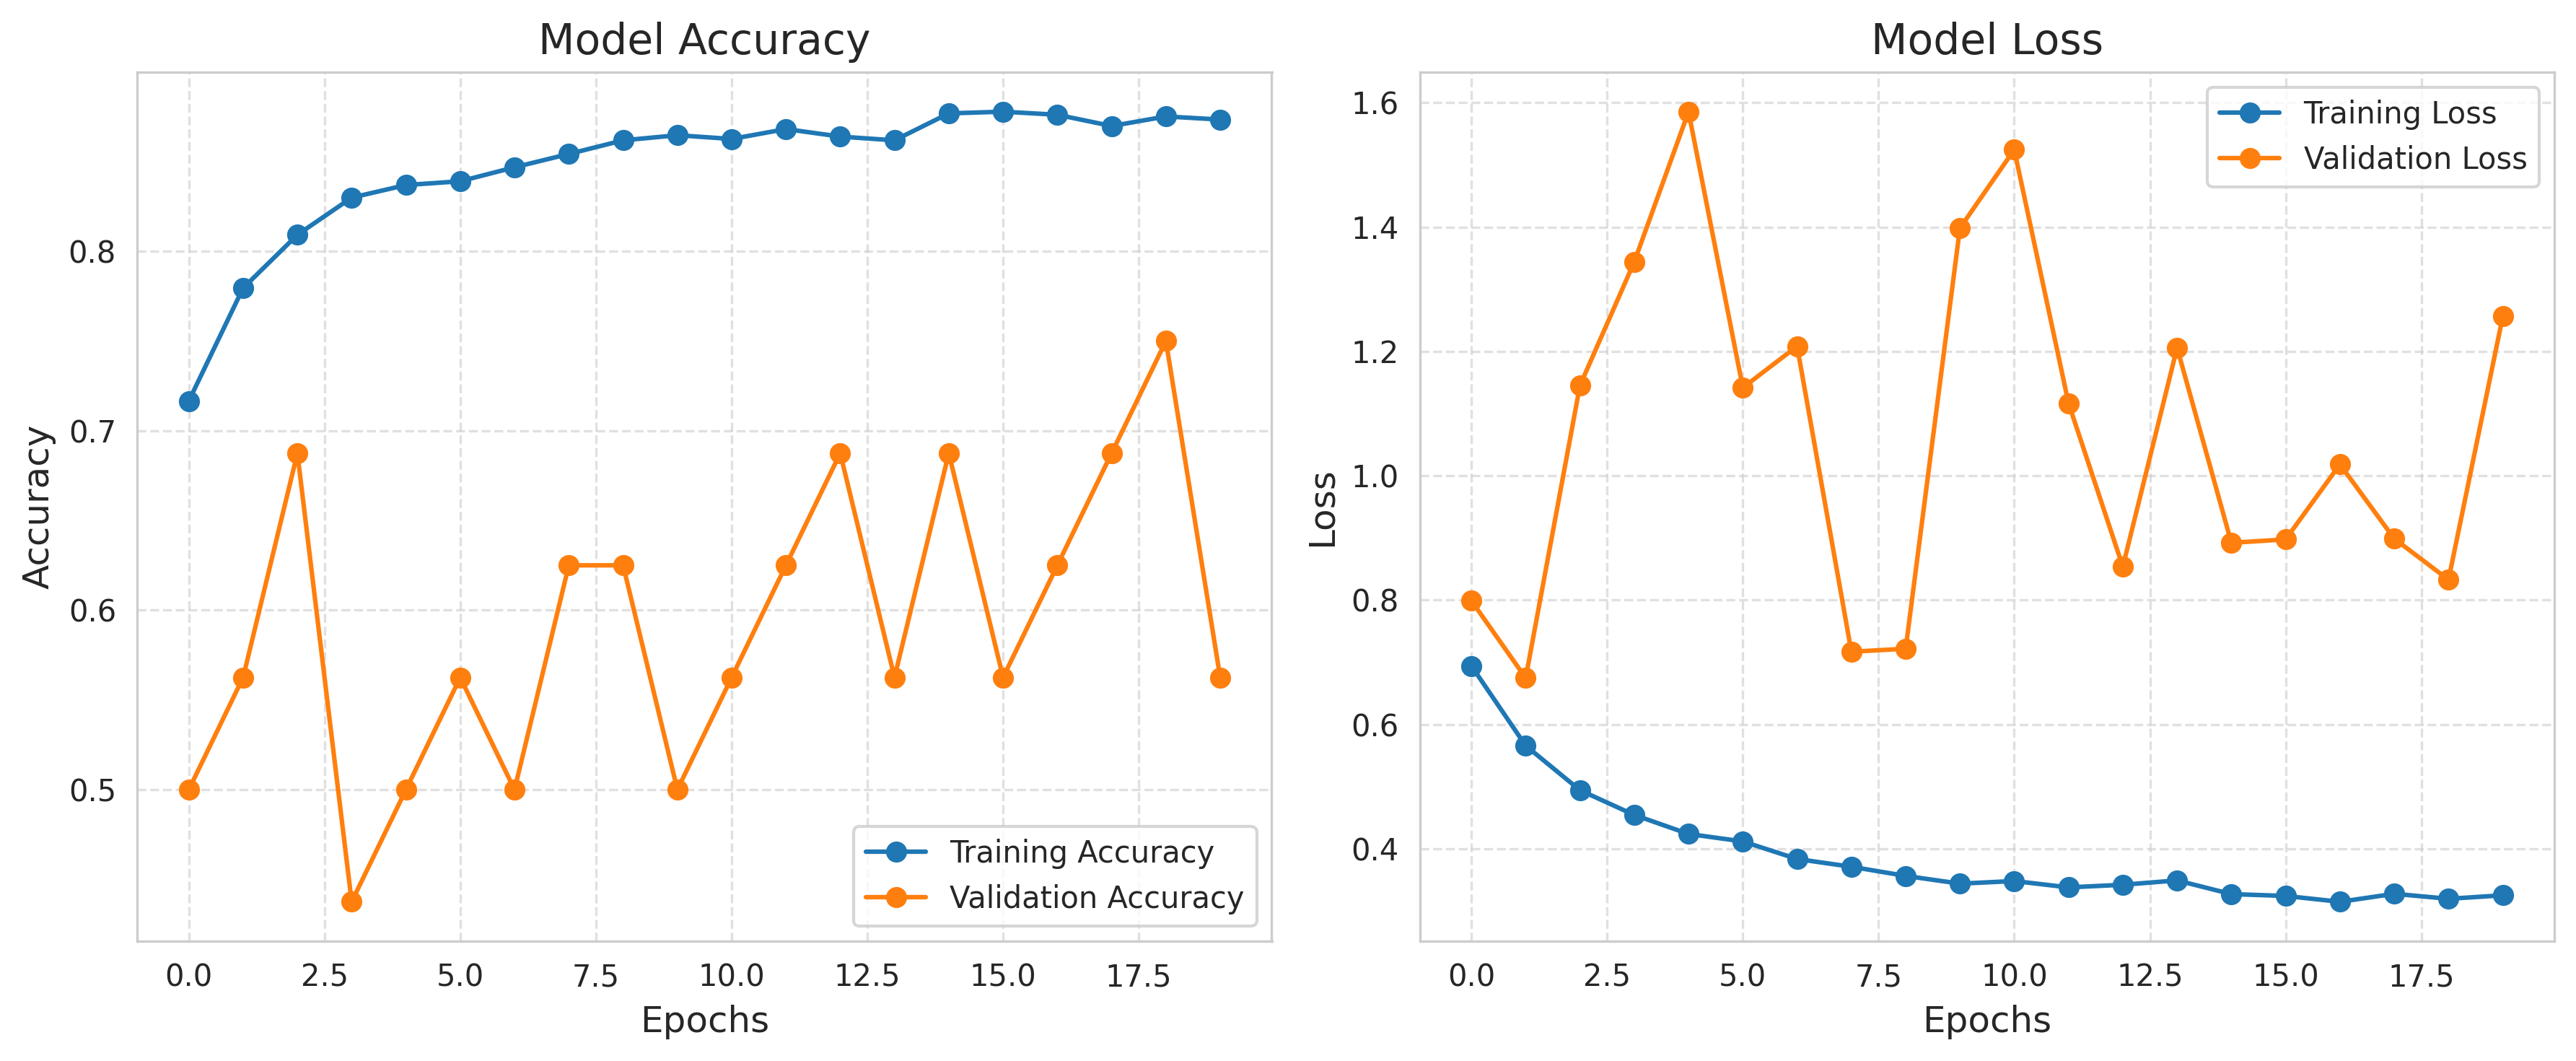

In [ ]:
plt.figure(figsize=(12, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o') # Changed hist to history
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o') # Changed hist to history
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o') # Changed hist to history
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='o') # Changed hist to history
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**ResNet101**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt


train_dir = "/content/drive/MyDrive/Dataset/chest_xray/train"
val_dir = "/content/drive/MyDrive/Dataset/chest_xray/val"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=1e-6)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=17,
    callbacks=[reduce_lr],
    verbose=1
)

Found 5261 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/17
165/165 ━━━━━━━━━━━━━━━━━━━━ 179s 854ms/step - accuracy: 0.6334 - loss: 0.8219 - val_accuracy: 0.5000 - val_loss: 0.6824 - learning_rate: 1.0000e-04
Epoch 2/17
165/165 ━━━━━━━━━━━━━━━━━━━━ 123s 744ms/step - accuracy: 0.7381 - loss: 0.6132 - val_accuracy: 0.5000 - val_loss: 1.5124 - learning_rate: 1.0000e-04
Epoch 3/17
165/165 ━━━━━━━━━━━━━━━━━━━━ 125s 754ms/step - accuracy: 0.7968 - loss: 0.5024 - val_accuracy: 0.6875 - val_loss: 0.5890 - learning_rate: 1.0000e-04
Epoch 4/17
165/165 ━━━━━━━━━━━━━━━━━━━━ 122s 740ms/step - accuracy: 0.8084 - loss: 0.4689 - val_accuracy: 0.5000 - val_loss: 1.8963 - learning_rate: 1.0000e-04
Epoch 5/17
165/165 ━━━━━━━━━━━━━━━━━━━━ 127s 772ms/step - accuracy: 0.8404 - loss: 0.4197 - val_accuracy: 0.5000 - val_loss: 2.3287 - learning_rate: 1.0000e-04
Epoch 6/17
165/165 ━━━━━━━━━━━━━━━━━━━━ 123s 747ms/step - accuracy: 0.8377 - loss: 0.3964 - val_accuracy: 0.5625 - val

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 45,419,905 (173.26 MB)

 Trainable params: 19,708,673 (75.18 MB)

 Non-trainable params: 25,711,232 (98.08 MB)

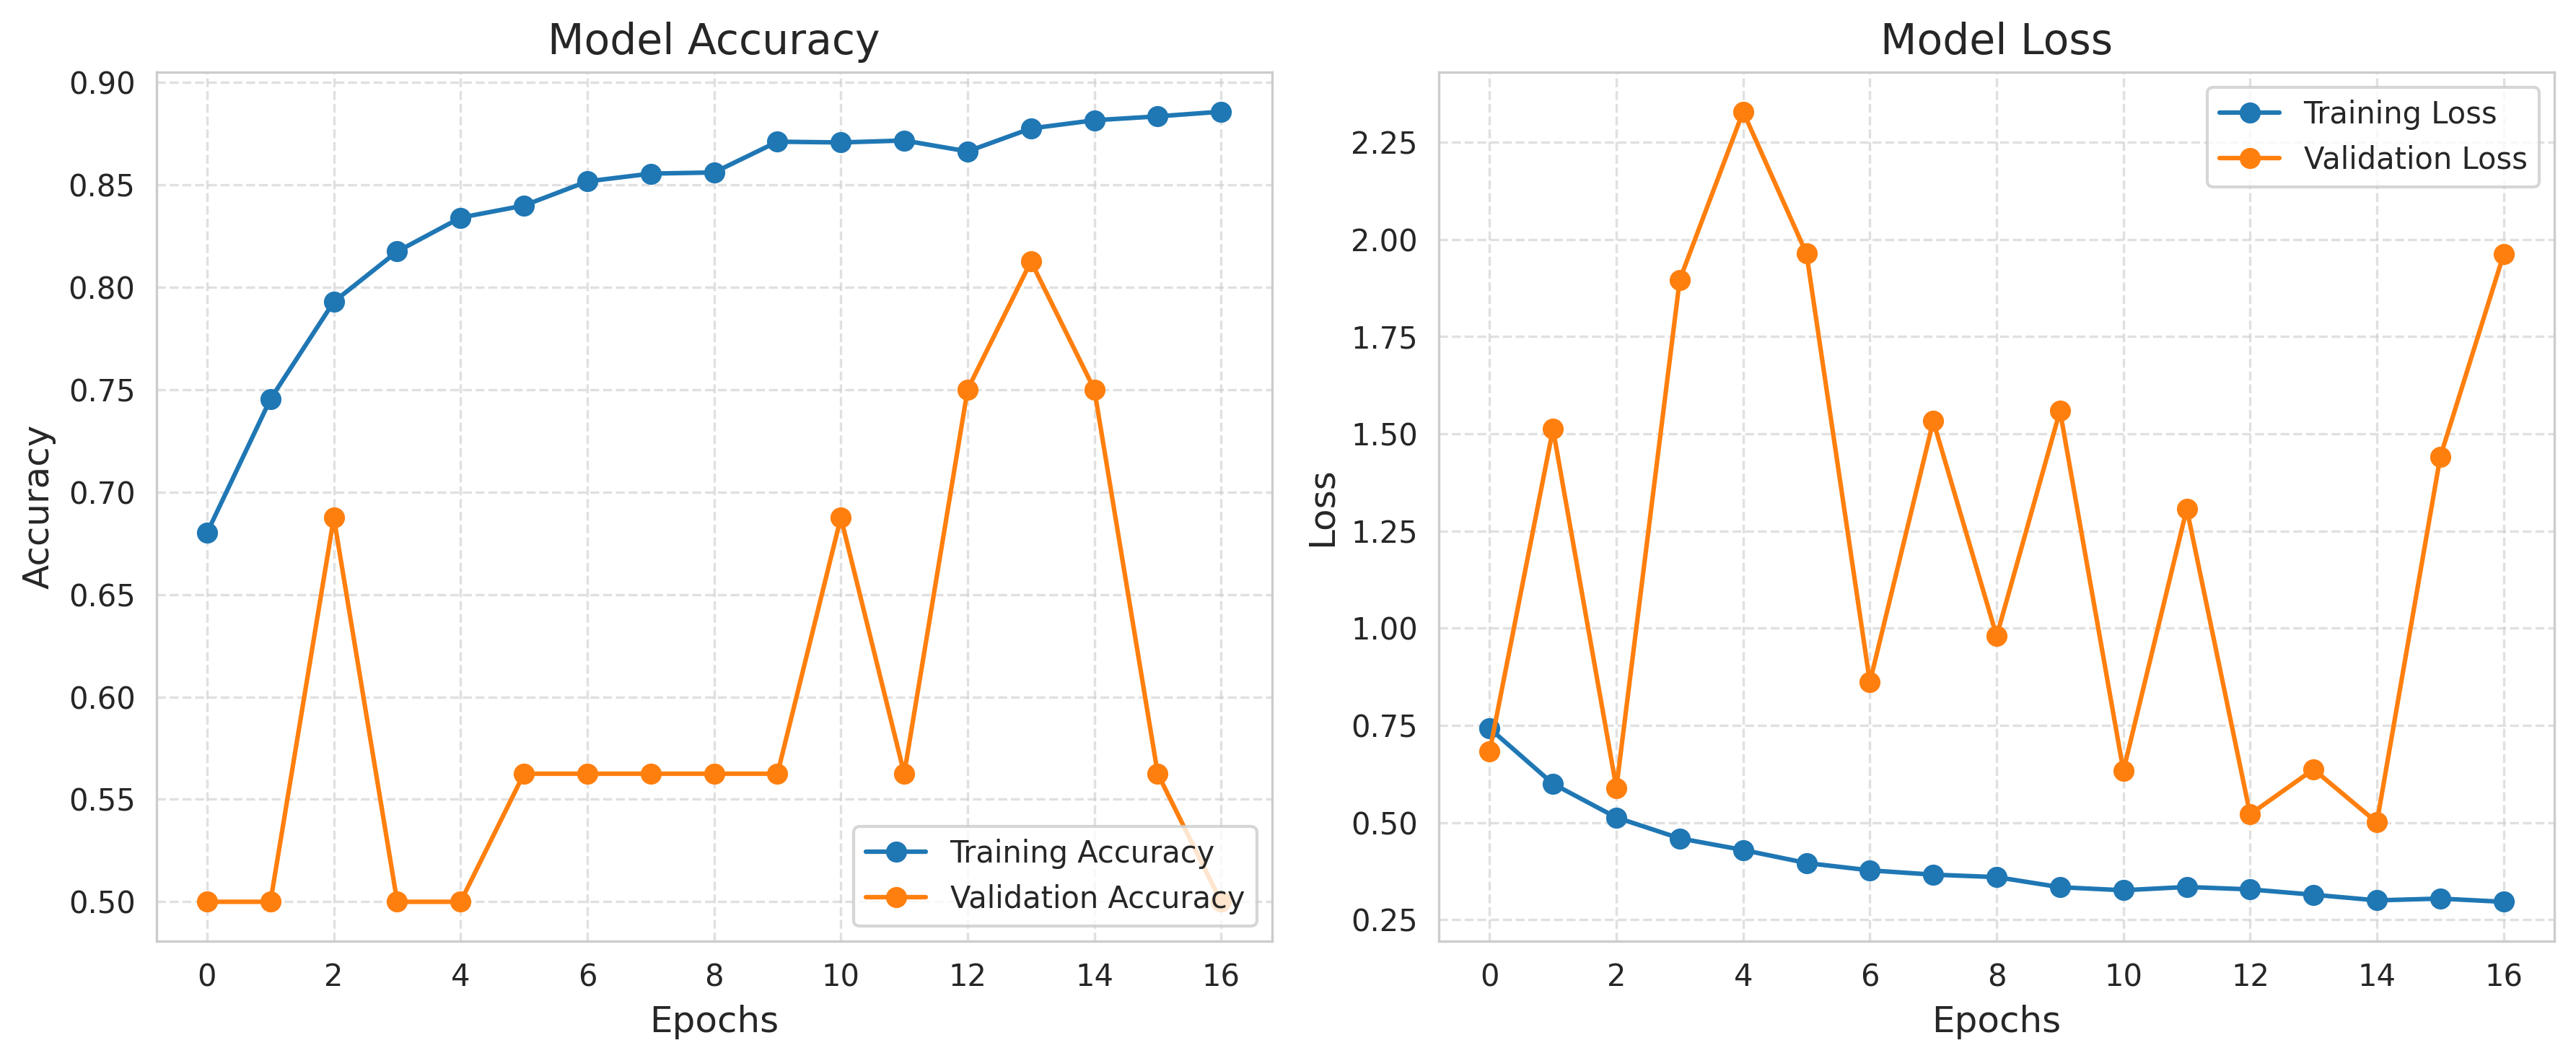

In [ ]:
plt.figure(figsize=(12, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o') # Changed hist to history
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o') # Changed hist to history
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o') # Changed hist to history
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='o') # Changed hist to history
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**EfficientNetV2L**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

train_dir = "/content/drive/MyDrive/Dataset/chest_xray/train"
val_dir = "/content/drive/MyDrive/Dataset/chest_xray/val"

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:200]:
    layer.trainable = False
for layer in base_model.layers[200:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator,validation_data=val_generator,epochs=30,verbose=1)

Found 5261 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 1089s 5s/step - accuracy: 0.6025 - loss: 0.8322 - val_accuracy: 0.7500 - val_loss: 0.6505
Epoch 2/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7187 - loss: 0.6160 - val_accuracy: 0.5625 - val_loss: 1.3409
Epoch 3/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.7701 - loss: 0.4610 - val_accuracy: 0.6250 - val_loss: 1.4812
Epoch 4/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.7982 - loss: 0.4233 - val_accuracy: 0.5625 - val_loss: 1.4219
Epoch 5/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.7974 - loss: 0.4032 - val_accuracy: 0.5625 - val_loss: 1.2201
Epoch 6/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8188 - loss: 0.3715 - val_accuracy: 0.5625 - val_loss: 1.4622
Epoch 7/30
165/165 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8272 - loss: 0.3579 - val_accuracy: 0.6250 - val_loss: 1.2212
Epoch 8/30
165

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ rescaling_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 32)   │          9,216 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 32)   │            128 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 32)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 112, 112, 32)   │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 112, 112, 32)   │          9,216 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 112, 112, 32)   │            128 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 112, 112, 32)   │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 112, 112, 32)   │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 112, 112, 32)   │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├──────────────────────

 Total params: 347,515,797 (1.29 GB)

 Trainable params: 113,896,825 (434.48 MB)

 Non-trainable params: 5,825,320 (22.22 MB)

 Optimizer params: 227,793,652 (868.96 MB)

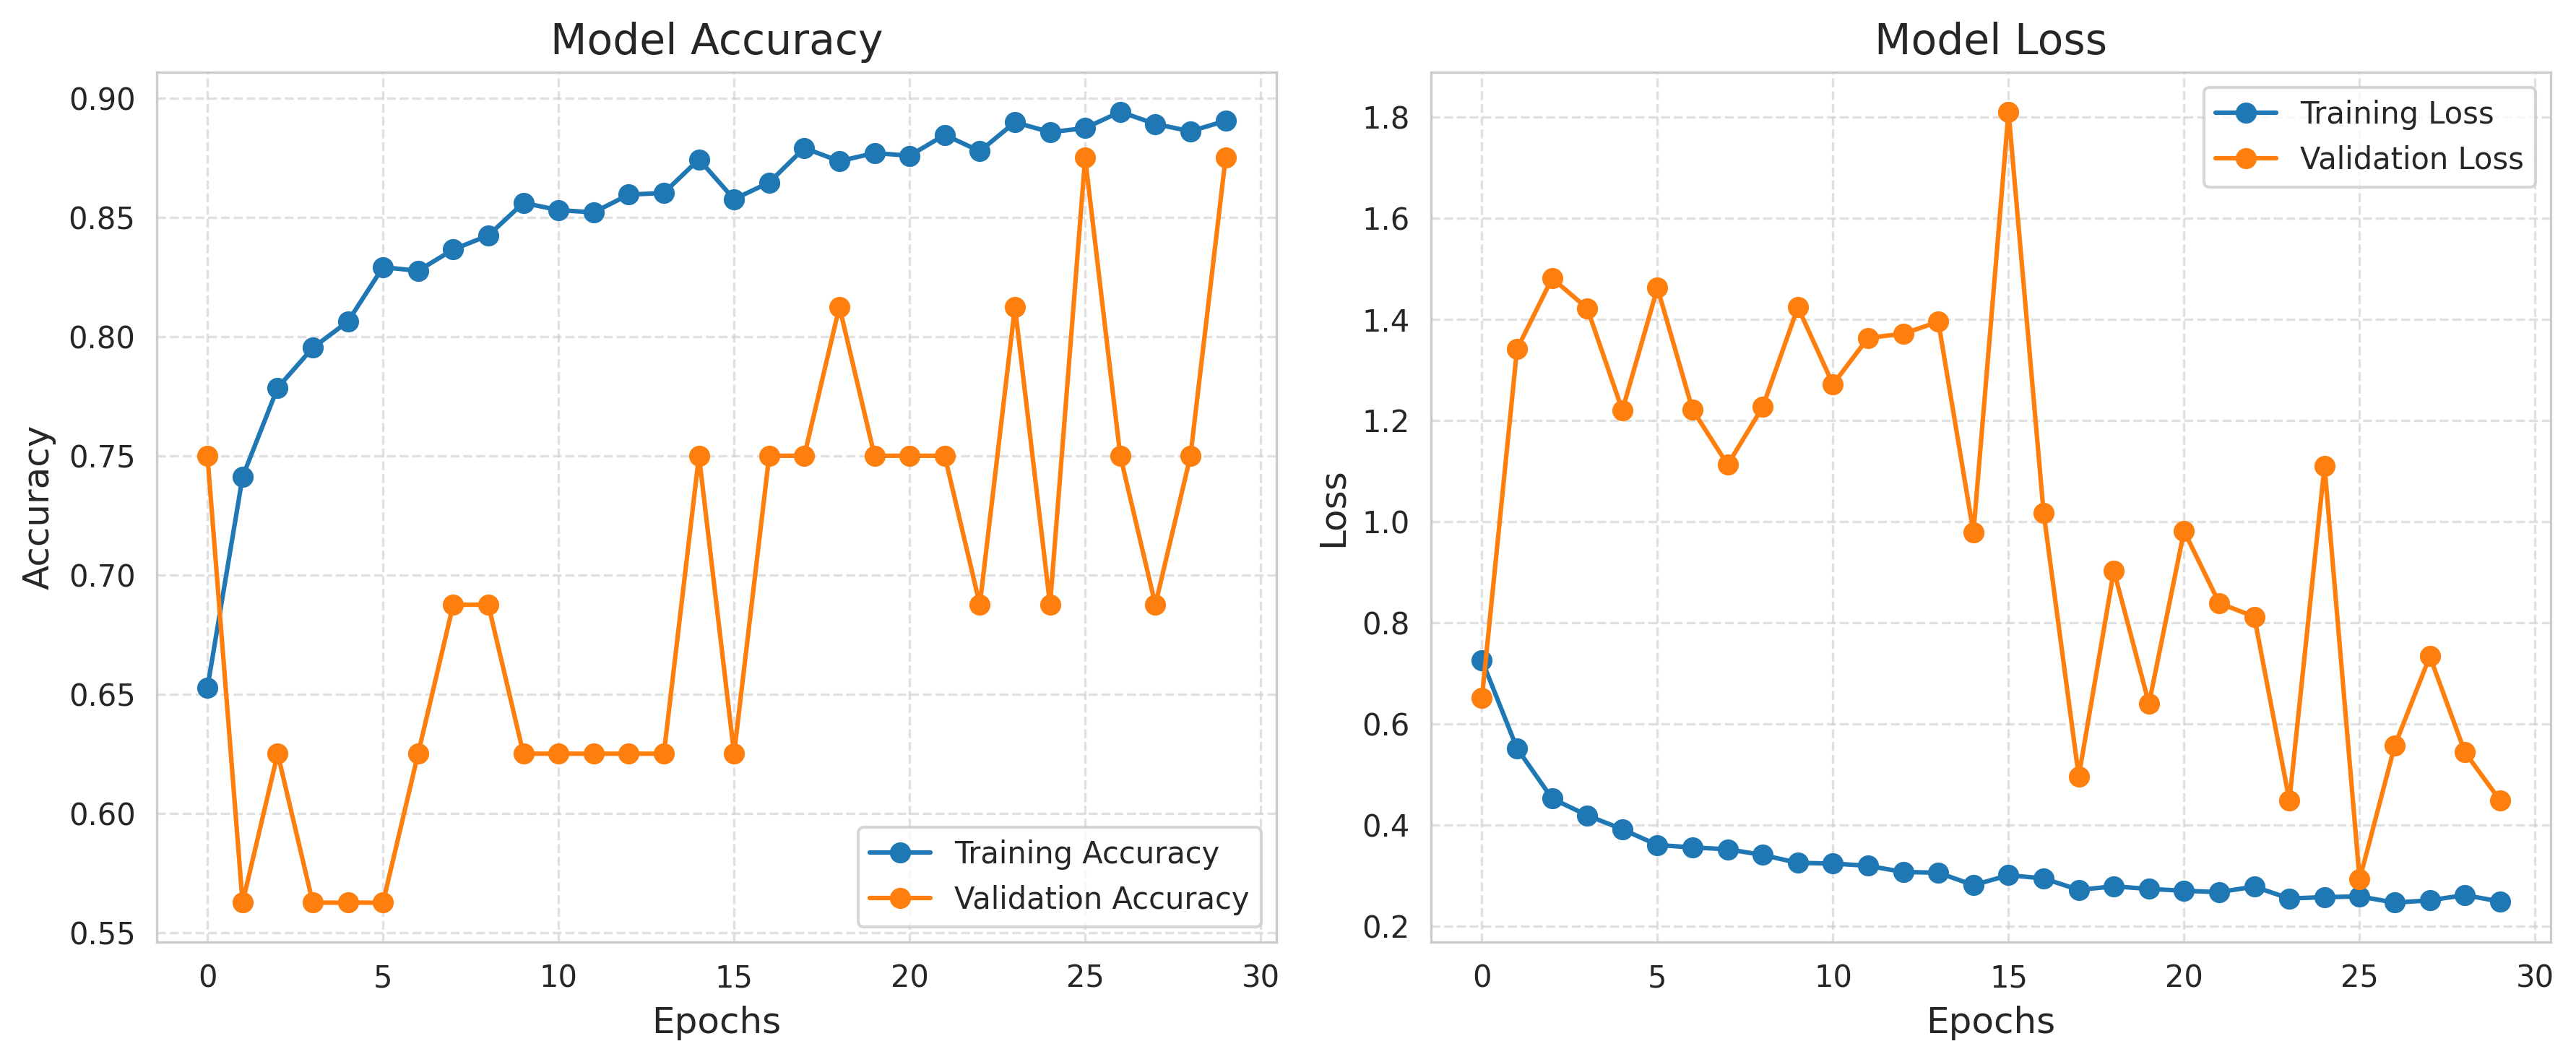

In [ ]:
plt.figure(figsize=(12, 5), dpi=300)

plt.subplot(1, 2, 1)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o') # Changed hist to history
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o') # Changed hist to history
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o') # Changed hist to history
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='o') # Changed hist to history
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Comparision** **Metrics**

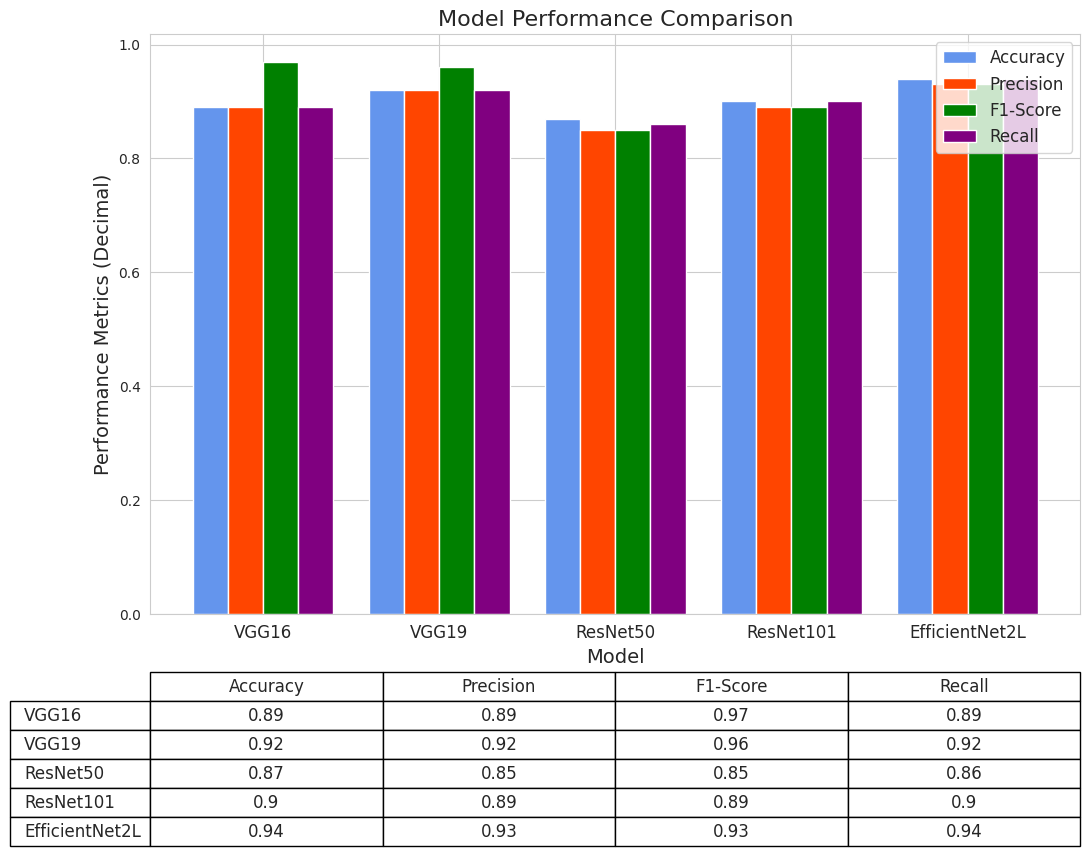

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

models = ["VGG16", "VGG19", "ResNet50", "ResNet101", "EfficientNet2L"]
accuracy = [0.89, 0.92, 0.87, 0.90, 0.94]
precision = [0.89, 0.92, 0.85, 0.89, 0.93]
f1_score = [0.97, 0.96, 0.85, 0.89, 0.93]
recall = [0.89, 0.92, 0.86, 0.90, 0.94]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 10))


ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="cornflowerblue")
ax.bar(x - 0.5 * width, precision, width, label="Precision", color="orangered")
ax.bar(x + 0.5 * width, f1_score, width, label="F1-Score", color="green")
ax.bar(x + 1.5 * width, recall, width, label="Recall", color="purple")


ax.set_ylabel("Performance Metrics (Decimal)", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_title("Model Performance Comparison", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)


data = np.array([accuracy, precision, f1_score, recall]).T
columns = ["Accuracy", "Precision", "F1-Score", "Recall"]
df = pd.DataFrame(data, index=models, columns=columns)


table = ax.table(cellText=df.round(3).values,
                 colLabels=df.columns,
                 rowLabels=df.index,
                 cellLoc='center',
                 loc='bottom',
                 bbox=[0, -0.4, 1, 0.3])


table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.subplots_adjust(bottom=0.3)

plt.savefig("model_performance_decimal.png", bbox_inches='tight', dpi=300)

plt.show()
